In [2]:
%matplotlib inline

import numpy as np
import networkx as nx
import matplotlib
import re
import os
import sys
import time
import itertools
import seaborn
import matplotlib.pyplot as plt



clrs = seaborn.color_palette("RdBu_r",n_colors=9)
seaborn.set(style='ticks',font_scale=2)

sys.path.append("/Users/Yves/Documents/Code/structural_knowledge/packages/")
import mouse_poker.optimize_task as mpko

# List of directed graphs with degree 2 and 9 vertices 

In [3]:
poke_pos = [  [265,456],
         [184,475],[347,475],
    [116,518],[265,518],[414,518],
         [184,561],[347,561],
              [265,580]]

In [58]:
poke_pos = np.array([  [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]])

In [5]:
edges = [[i-1,i] for i in range(1,9)]
edges.extend([[i+1,i] for i in range(0,8)])

In [6]:
rew_nodes = [0,3,5,8]

In [7]:
layouts = mpko.layout.get_all_valid_physical_layouts(rew_nodes,9)

In [8]:
edge_set = mpko.layout.get_transition_set(edges)

In [10]:
lyt = layouts[1]
all_angle = []
all_dists = []

for lyt in layouts:
    tmpA = []
    tmpD = []

    for kk,e in enumerate(edge_set):
        if len(e)==2:
            tmp1 = mpko.layout.angle_between(np.array(poke_pos[lyt[e[0]]]),
                                            np.array(poke_pos[lyt[kk]]),
                                            np.array(poke_pos[lyt[e[1]]]))
            tmpA.append(tmp1%180)
            
            d_ = np.abs(np.array(poke_pos[lyt[e[0]]]) - np.array(poke_pos[lyt[e[1]]]))
            tmpD.append(d_)
    all_angle.append(tmpA.copy())
    all_dists.append(tmpD.copy())

In [11]:
mu_angle = [np.mean(i) for i in all_angle]
var_angle = [np.std(i) for i in all_angle]
var_dist =   [np.std(i) for i in all_dists]

In [12]:
np.corrcoef(mu_angle,var_angle)

array([[1.        , 0.53993542],
       [0.53993542, 1.        ]])

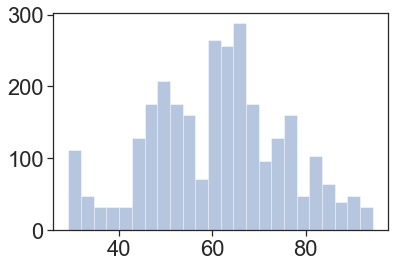

In [13]:
seaborn.distplot(var_dist,kde=0)

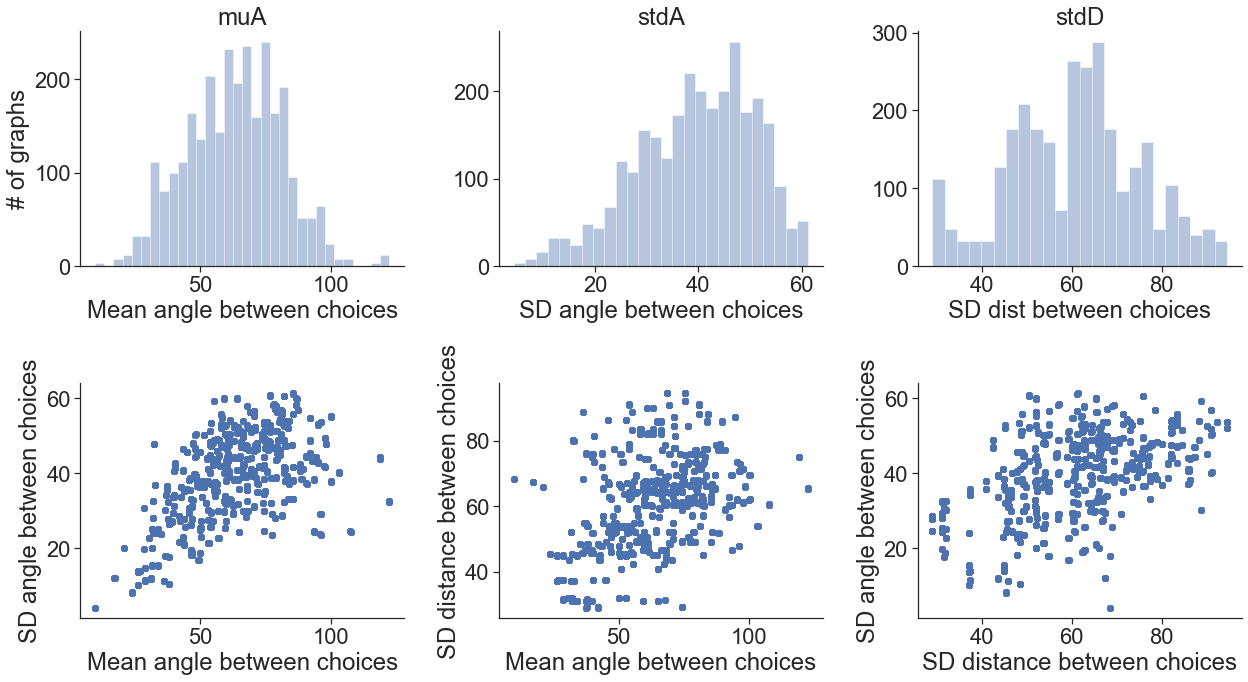

In [14]:
plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
plt.title("muA")
seaborn.distplot(mu_angle,kde=0)
plt.ylabel("# of graphs")
plt.xlabel("Mean angle between choices")

plt.subplot(2,3,2)
plt.title("stdA")
seaborn.distplot(var_angle,kde=0)
plt.xlabel("SD angle between choices")

plt.subplot(2,3,3)
plt.title("stdD")
seaborn.distplot(var_dist,kde=0)
plt.xlabel("SD dist between choices")



plt.subplot(2,3,4)
plt.scatter(mu_angle,var_angle)
plt.ylabel("SD angle between choices")
plt.xlabel("Mean angle between choices")

plt.subplot(2,3,5)
plt.scatter(mu_angle,var_dist)
plt.ylabel("SD distance between choices")
plt.xlabel("Mean angle between choices")

plt.subplot(2,3,6)
plt.scatter(var_dist,var_angle)
plt.ylabel("SD angle between choices")
plt.xlabel("SD distance between choices")

plt.tight_layout()

seaborn.despine()


In [15]:
np.argsort(mu_angle)[-10:]

array([2165, 1528, 1139, 2442,  437, 1740, 2263, 1525, 1354,  616])

In [16]:
np.argsort(mu_angle)[-60:][::6]

array([2293, 1549, 1149, 2179, 1430,  162, 1716, 1360,  714,  437])

In [17]:
np.array(mu_angle)[np.argsort(mu_angle)[-20:]]

array([107.69045917, 107.69045917, 107.69045917, 107.69045917,
       118.95031032, 118.95031032, 118.95031032, 118.95031032,
       119.08816142, 119.08816142, 119.08816142, 119.08816142,
       122.44588181, 122.44588181, 122.44588181, 122.44588181,
       122.5509901 , 122.5509901 , 122.5509901 , 122.5509901 ])

In [18]:
np.array(mu_angle)[np.argsort(mu_angle)[-8*16:][::8]]

array([ 93.57152591,  94.40467379,  95.14185427,  95.17920919,
        96.04492794,  96.23842129,  96.31656624,  97.66956516,
        97.7315115 ,  98.2283865 , 100.00927019, 100.11398064,
       103.05479306, 107.48805913, 118.95031032, 122.44588181])

In [19]:
G = nx.DiGraph()
G.add_edges_from(edges)

In [21]:
np.argsort(mu_angle)[-6*24:][::6]

array([1173, 1443, 1971,  910,   65, 2765, 1451, 2497, 1158,  186,  708,
       1504,  167, 2426, 2293, 1549, 1149, 2179, 1430,  162, 1716, 1360,
        714,  437])

In [27]:
ix = 437
ix2 = 714

In [36]:
layout = np.array(layouts[ix])

In [41]:
layout

array([0, 2, 7, 8, 6, 3, 1, 4, 5])

In [40]:
mpko.layout.flip(layout)

[8, 7, 2, 0, 1, 3, 6, 4, 5]

In [60]:
def graph_same(layout1,layout2):
    """ Check if two graphs have the same layout"""
    
    flp = lambda x,y: mpko.layout.flip(x,y)
    
    layout1 = np.array(layout1)
    layout1_rev = np.flipud(layout1)
    layout2_ = np.array(layout2).copy()
    
    for rot in range(4):
        
        if np.logical_or.reduce([np.all(layout1==layout2_) or 
                                 np.all(layout1==flp(layout2_,'V')) or 
                                 np.all(layout1==flp(layout2_,'H')) or
                                 np.all(layout1==flp(flp(layout2_,'H'),'V')),
                                 np.all(layout1_rev==layout2_) or 
                                 np.all(layout1_rev==flp(layout2_,'V')) or 
                                 np.all(layout1_rev==flp(layout2_,'H')) or
                                 np.all(layout1_rev==flp(flp(layout2_,'H'),'V'))]):
            return True
        
        
        layout2_ = np.array(mpko.layout.rotate(layout2_))
        


    if np.logical_or.reduce([np.all(layout1==layout2_) or 
                             np.all(layout1==flp(layout2_,'V')) or 
                             np.all(layout1==flp(layout2_,'H')) or
                             np.all(layout1==flp(flp(layout2_,'H'),'V')),
                             np.all(layout1_rev==layout2_) or 
                             np.all(layout1_rev==flp(layout2_,'V')) or 
                             np.all(layout1_rev==flp(layout2_,'H')) or
                             np.all(layout1_rev==flp(flp(layout2_,'H'),'V'))]):
        return True
    else:
        return False

In [52]:
flp = lambda x,y='H': mpko.layout.flip(x,y)
rot = lambda x,y='cw': mpko.layout.rotate(x)

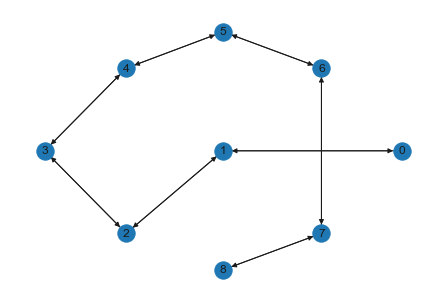

In [53]:
   nx.draw(G,
        pos=np.array(poke_pos)[rot(np.array(layouts[ix2]),'ccw')],#[np.random.permutation(range(9))],
        connectionstyle='arc3, rad=0.0',
        with_labels=True)

In [59]:
poke_pos[rot(np.array(layouts[ix2]),'ccw')]==np.flipud(poke_pos[layouts[ix]])

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

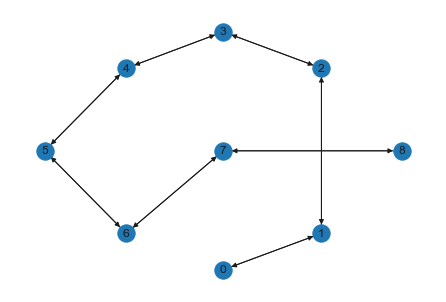

In [26]:
   nx.draw(G,
        pos=np.array(poke_pos)[np.array(layouts[ix])],#[np.random.permutation(range(9))],
        connectionstyle='arc3, rad=0.0',
        with_labels=True)

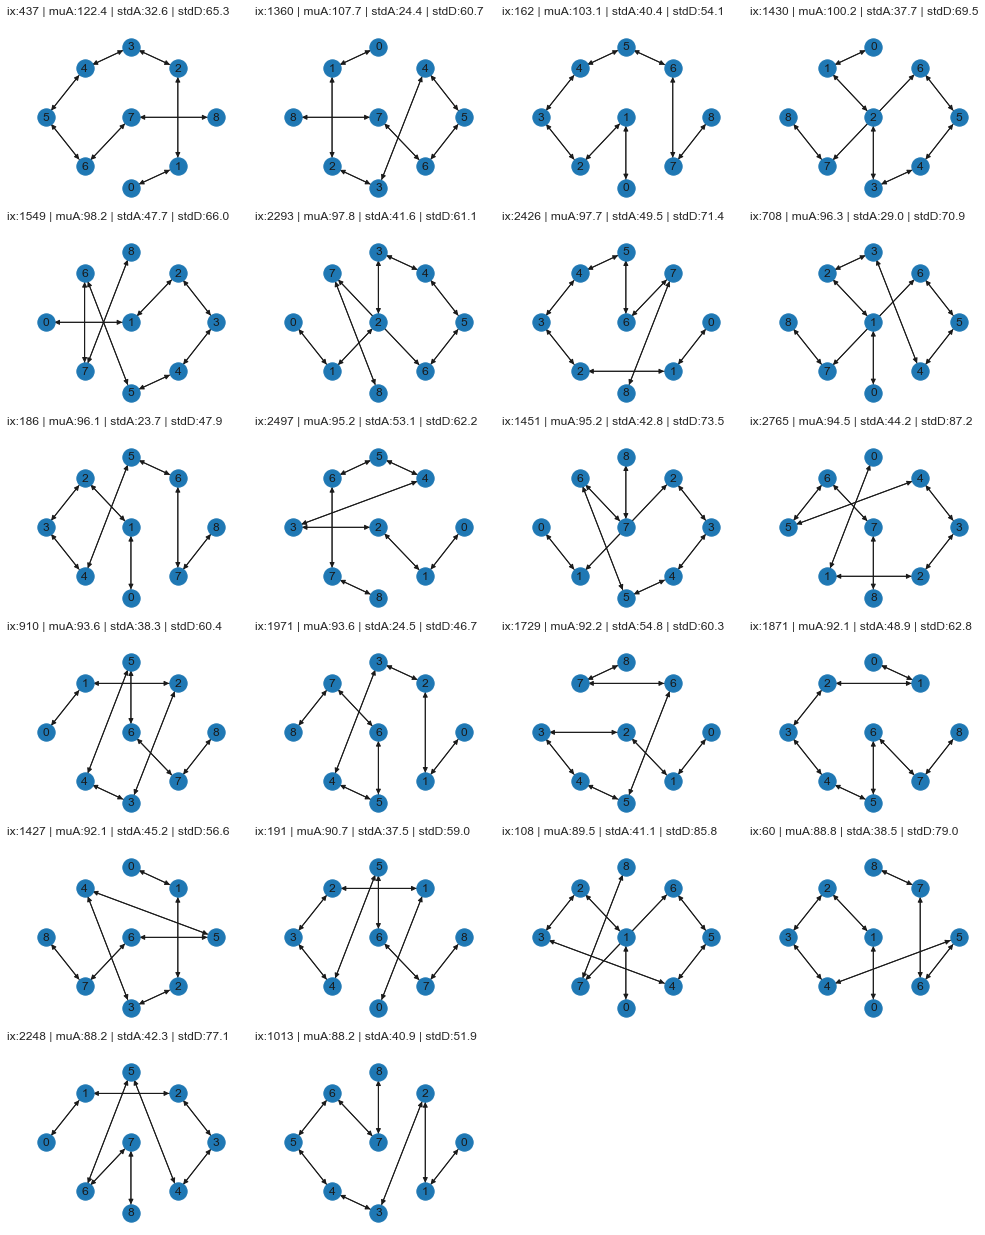

In [64]:
plt.figure(figsize=(17,22))
ijk = 1
seen_gfs = []
for ix in reversed(np.argsort(mu_angle)[-6*36:][::6]):
    seen = False
    for i in seen_gfs:
        seen = seen or graph_same(i,layouts[ix])
    if not seen:
        seen_gfs.append(np.array(layouts[ix]))
        plt.subplot(6,4,ijk)
        plt.gca().annotate('ix:{:.0f} | muA:{:.1f} | stdA:{:.1f} | stdD:{:.1f}'.format(ix,mu_angle[ix],var_angle[ix],var_dist[ix]),
                           [-.1,1.1],xycoords='axes fraction',fontsize=12)
        nx.draw(G,
            pos=np.array(poke_pos)[np.array(layouts[ix])],#[np.random.permutation(range(9))],
            connectionstyle='arc3, rad=0.0',
            with_labels=True)

        ijk += 1

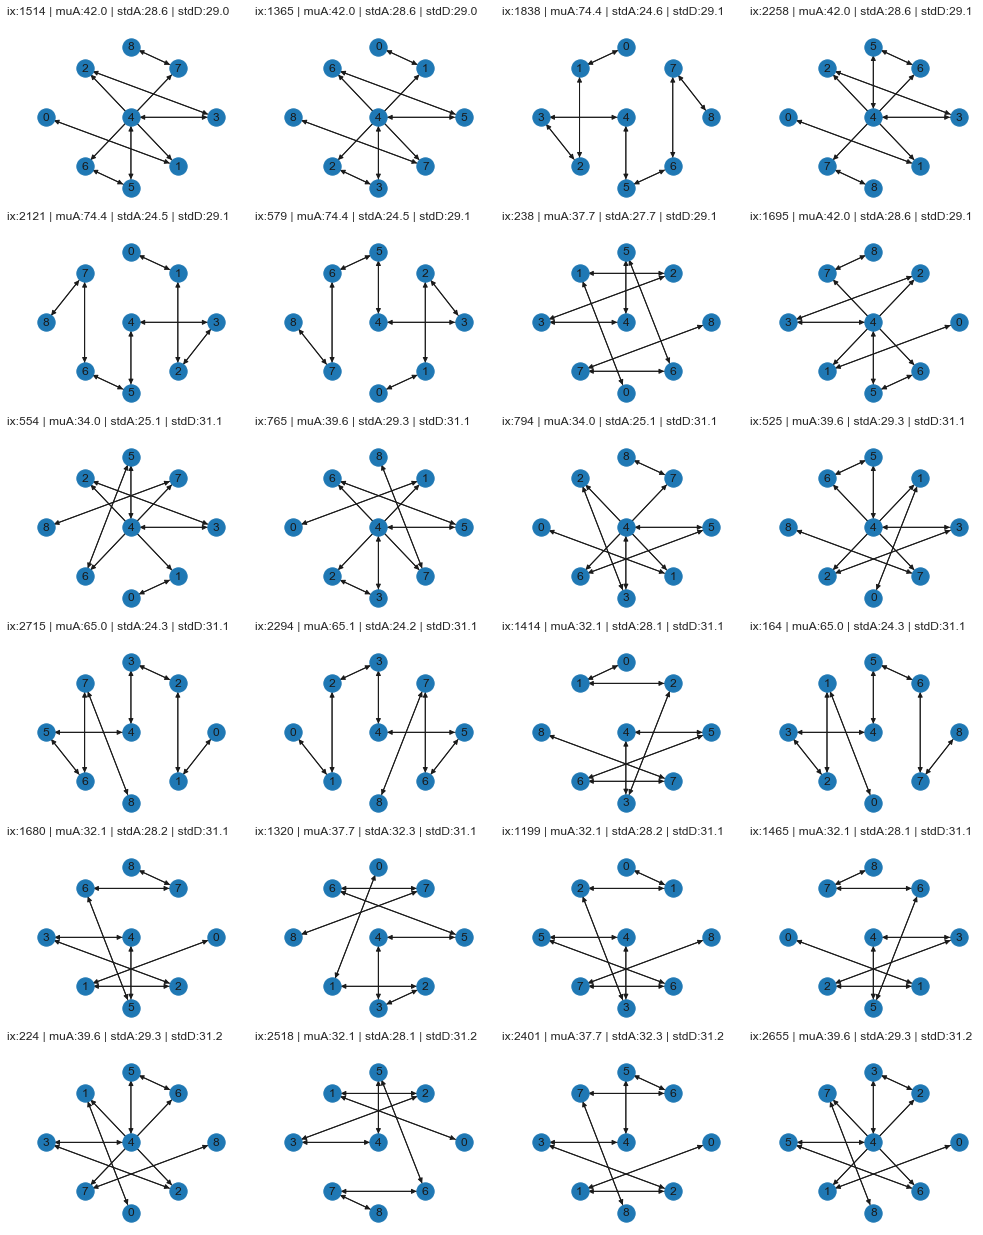

In [179]:
plt.figure(figsize=(17,22))
ijk = 1
for ix in np.argsort(var_dist)[:4*24][::4]:
    plt.subplot(6,4,ijk)
    plt.gca().annotate('ix:{:.0f} | muA:{:.1f} | stdA:{:.1f} | stdD:{:.1f}'.format(ix,mu_angle[ix],var_angle[ix],var_dist[ix]),
                       [-.1,1.1],xycoords='axes fraction',fontsize=12)
    nx.draw(G,
        pos=np.array(poke_pos)[np.array(layouts[ix])],#[np.random.permutation(range(9))],
        connectionstyle='arc3, rad=0.0',
        with_labels=True)
    
    ijk += 1

In [190]:
G

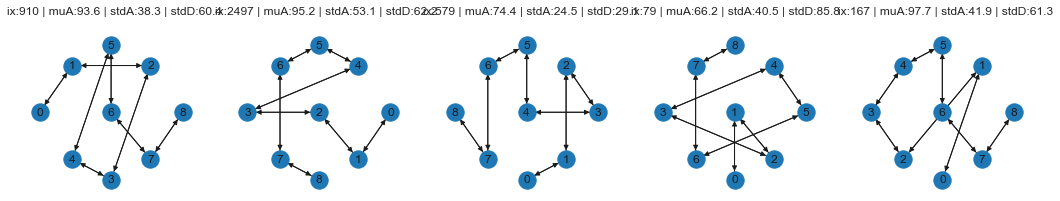

In [189]:
plt.figure(figsize=(18,3))
ijk = 1
for ix in [910,2497,579,79,167]:
    plt.subplot(1,5,ijk)
    plt.gca().annotate('ix:{:.0f} | muA:{:.1f} | stdA:{:.1f} | stdD:{:.1f}'.format(ix,mu_angle[ix],var_angle[ix],var_dist[ix]),
                       [-.1,1.1],xycoords='axes fraction',fontsize=12)
    nx.draw(G,
        pos=np.array(poke_pos)[np.array(layouts[ix])],#[np.random.permutation(range(9))],
        connectionstyle='arc3, rad=0.0',
        with_labels=True)
    
    ijk += 1

# Define rotation functions 

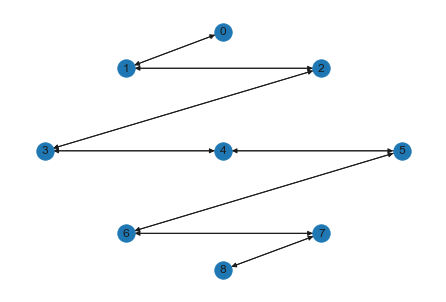

In [261]:
layout = range(9)
#layout = np.array(layouts[ix])
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[layout],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)


In [247]:
[3,6,1,8,4,0,,5]

In [272]:
def flip(layout,axis='V'):
    if axis=='V':
        #defines new position of nodes after flip, 
        #node 0 should go to pos 8; node 1 to pos 6 etc
        flip = [8,6,7,3,4,5,1,2,0]
    elif axis=='H':
        flip = [0,2,1,5,4,3,7,6,8]
    else:
        raise ValueError('can only flip vertically ("V")or horizontally ("H")')
        
    layout2 = [flip[i] for i in layout]
    return layout2


def rotate(layout,direction='cw'):
    if direction=='cw':
        #defines new position of nodes after rotation, 
        #node 0 should go to pos 5; node 1 to pos 2 etc
        rot = [5,2,7,0,4,8,1,6,3]  
    elif direction=='ccw':
        rot = [3,6,1,8,4,0,7,2,5]
    else:
        raise ValueError('Can only rotate the graph clockwise ("cw") or counterclockwise ("ccw")')
    
    layout2 = [rot[i] for i in layout]
    return layout2

In [285]:
def rotate(layout,direction='cw'):
    if direction=='cw':
        #defines new position of nodes after rotation, 
        #node 0 should go to pos 5; node 1 to pos 2 etc
        rot = [5,2,7,0,4,8,1,6,3]  
    elif direction=='ccw':
        rot = [3,6,1,8,4,0,7,2,5]
    else:
        raise ValueError('Can only rotate the graph clockwise ("cw") or counterclockwise ("ccw")')
    
    layout2 = [rot[i] for i in layout]
    return layout2

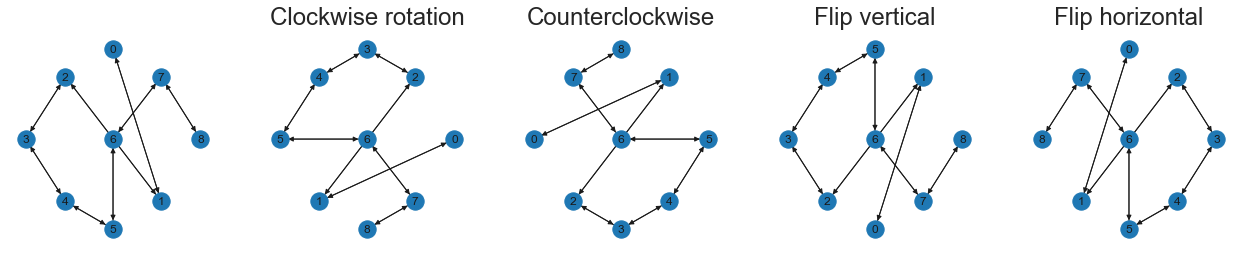

In [289]:
#layout = range(9)#np.array(layouts[ix])
plt.figure(figsize=(22,4))
plt.subplot(1,5,1)
#layout = range(9)
layout = np.array(layouts[ix])
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[layout],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

plt.subplot(1,5,2)
plt.title("Clockwise rotation")
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[rotate(layout,'cw')],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)


plt.subplot(1,5,3)
plt.title("Counterclockwise")
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[rotate(layout,'ccw')],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)


plt.subplot(1,5,4)
plt.title("Flip vertical")
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[flip(layout,'V')],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)


plt.subplot(1,5,5)
plt.title("Flip horizontal")
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[flip(layout,'H')],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)


# Dumb test to see if 4 rotations equals full circle 

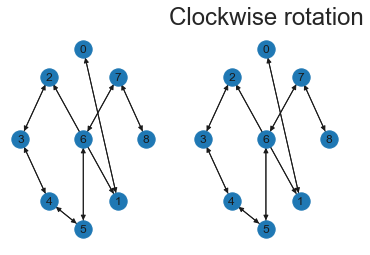

In [292]:
layout = np.array(layouts[ix])
plt.subplot(1,2,1)
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[layout],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

plt.subplot(1,2,2)
plt.title("Clockwise rotation")
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[rotate(rotate(rotate(rotate(layout,'cw'))))],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)



# Dumb test two to see that two clockwise rotations is mirror of horitzontal flip

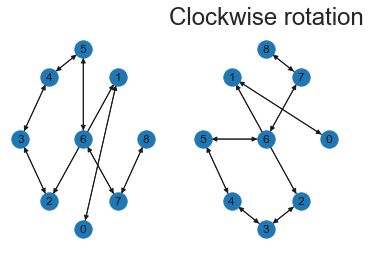

In [296]:
layout = np.array(layouts[ix])
plt.subplot(1,2,1)
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[flip(layout)],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)

plt.subplot(1,2,2)
plt.title("Clockwise rotation")
nx.draw(G,
    pos=np.array([1,-1])*np.array(poke_pos)[(flip(rotate(layout,'cw')))],#[np.random.permutation(range(9))],
    connectionstyle='arc3, rad=0.0',
    with_labels=True)



In [ ]:
#Each group should have two different graphs that are not mirrors, rotations etc
#Each graph should appear equally often
#It is an underdetermined problem